In [105]:
import cv2
import math
import numpy as np
# from cv_bridge import CvBridge

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import PyQt5

In [106]:
def hsv(img, color='green'):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # 휴리스틱으로 구한거 같은데? 오진다,
    if color == 'green':
        mask = cv2.inRange(hsv, (25, 60, 50), (86, 255, 255))
    elif color == 'red':
        mask = cv2.inRange(hsv, (115, 100, 50), (130, 255, 255))
    elif color == 'blue':
        mask = cv2.inRange(hsv, (10, 150, 50), (30, 255, 255))
    elif color == 'yellow':
        mask = cv2.inRange(hsv, (80, 40, 145), (150, 255, 255))
        # mask = cv2.inRange(hsv, (80, 100, 145), (150, 255, 255))

    imask = mask > 0
    output = np.zeros_like(hsv, np.uint8)
    output[imask] = 255

    return output[:,:,0]


In [107]:
def detect_square(input):
    min_area = 740
    H, W = input.shape[:2]
    # image morpholgy로 라인만 찾는거 같음
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9)) # kernel 만들기
    clean = cv2.morphologyEx(input, cv2.MORPH_OPEN, kernel) # 이럴거면 왜 이미지 하나로 opening, closing하는지?
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
    img_clean = cv2.morphologyEx(input, cv2.MORPH_CLOSE, kernel)
    cv2.imwrite('test.png', clean)

    contours, hier = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #RETR_EXTERNAL: 외각선만 찾기, CHAIN_APPROX_SIMPLE: 수직선, 수평선, 대각선에 대해 끝점만 저장
    # contours = contours[0] if len(contours) == 2 else contours[1]
    # zzz = cv2.drawContours(clean, contours, -1, (0,255,0), 4)
    # cv2.imwrite('tett.png', zzz)

    # square = None
    # square_center = 0
    # is_square = False

    # for c in contours:
    #     rot_rect = cv2.minAreaRect(c) # contour를 둘러싸는 최소한 크기의 직사각형 만들기
    #     temp_area = rot_rect[1][0] * rot_rect[1][1]
    #     temp_square = cv2.boxPoints(rot_rect)
    #     temp_center = np.int0(np.mean(temp_square, axis=0))

    #     if temp_area >= min_area and temp_center[0] > square_center:
    #         square = np.int0(temp_square)
    #         square_center = temp_center[0]
    #         area = temp_area
    #         is_square = True

    return img_clean

In [114]:
img = cv2.imread("x.png")
img_temp = hsv(img, "yellow")
img_clean = detect_square(img_temp)
cv2.imwrite("tt.png",img_temp)
# x, _ = detect_square(img_temp)
# cv2.imwrite("tt.png", x)


True

(2000, 1430)
715 324 1025


(2000, 1430)


/var/folders/6g/s0rbwl9n52nclf8r0s_dds6h0000gn/T/ipykernel_13216/2658452950.py:73: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
/var/folders/6g/s0rbwl9n52nclf8r0s_dds6h0000gn/T/ipykernel_13216/2658452950.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w

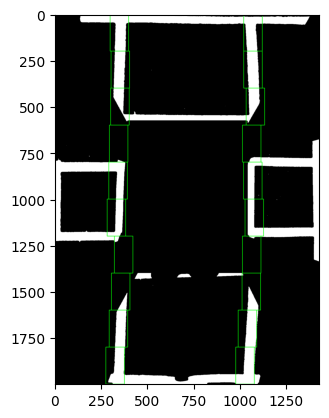

In [117]:

# plt.imshow(img_warped_croped, cmap='gray')
img_warped_croped = img_clean

out_img = cv2.cvtColor(img_clean, cv2.COLOR_BGR2RGB)
# print(type(img_warped_croped))
# HYPERPARAMETERS
# Choose the number of sliding windows
nwindows = 10

# Set the width of the windows +/- margin
margin = 50

# Set minimum number of pixels found to recenter window
minpix = 50

# Set height of windows - based on nwindows above and image shape
window_height = np.int64(img_warped_croped.shape[0]//nwindows)

# Create an output image to draw on and visualize the result
# out_img = np.dstack((img_warped_croped*255, img_warped_croped*255, img_warped_croped*255))
print(img_warped_croped.shape)


# Take a histogram of the bottom half of the image
histogram = np.sum(img_warped_croped[img_warped_croped.shape[0]-window_height:img_warped_croped.shape[0],:], axis=0)


midpoint = np.int64(histogram.shape[0]//2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint



nonzero = img_warped_croped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Current positions to be updated later for each window in nwindows
leftx_current = leftx_base
rightx_current = rightx_base

# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
# for window in range(nwindows):
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = img_warped_croped.shape[0] - (window+1)*window_height
    win_y_high = img_warped_croped.shape[0] - window*window_height
    ### TO-DO: Find the four below boundaries of the window ###
    win_xleft_low = leftx_current - margin  # Update this
    win_xleft_high = leftx_current + margin  # Update this
    win_xright_low = rightx_current - margin  # Update this
    win_xright_high = rightx_current + margin  # Update this

    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low, win_y_low),(win_xleft_high, win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # plt.imshow(xx)
    ### TO-DO: Identify the nonzero pixels in x and y within the window ###
    good_left_inds = ((nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high) & (nonzeroy >= win_y_low) & (nonzeroy < win_y_high)).nonzero()[0]
    good_right_inds = ((nonzerox >= win_xright_low) & (nonzerox < win_xright_high) & (nonzeroy >= win_y_low) & (nonzeroy < win_y_high)).nonzero()[0]

    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)

    ### TO-DO: If you found > minpix pixels, recenter next window ###
    ### (`right` or `leftx_current`) on their peak histogram ###
    if(len(good_left_inds) > minpix):
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if(len(good_right_inds) > minpix):
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# plt.figure(figsize = (24, 9))
plt.imshow(out_img)

[0.000e+00 1.000e+00 2.000e+00 ... 1.997e+03 1.998e+03 1.999e+03]


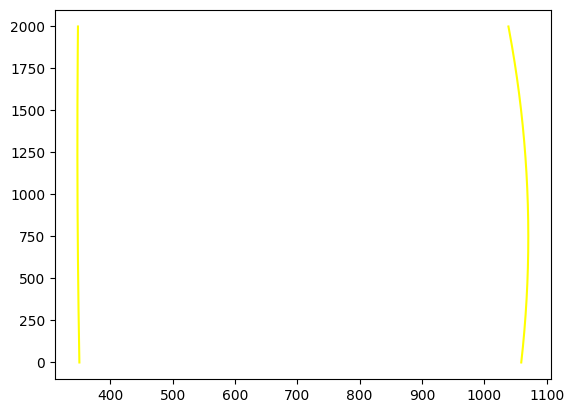

In [118]:
# Concatenate the arrays of indices (previously was a list of lists of pixels)
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Generate x and y values for plotting
ploty = np.linspace(0, img_warped_croped.shape[0]-1, img_warped_croped.shape[0] )
print(ploty)
try:
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
except TypeError:
    # Avoids an error if `left` and `right_fit` are still none or incorrect
    print('The function failed to fit a line!')
    left_fitx = 1*ploty**2 + 1*ploty
    right_fitx = 1*ploty**2 + 1*ploty

## Visualization ##
# Colors in the left and right lane regions
out_img[lefty, leftx] = [255, 0, 0]
out_img[righty, rightx] = [0, 0, 255]

# Plots the left and right polynomials on the lane lines
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')

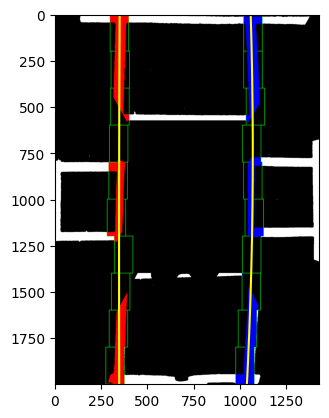

In [119]:
out_img[lefty, leftx] = [255, 0, 0]
out_img[righty, rightx] = [0, 0, 255]

plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.imshow(out_img)

In [120]:
def fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0] * (ploty ** 2) + left_fit[1] * ploty + left_fit[2]
    right_fitx = right_fit[0] * (ploty ** 2) + right_fit[1] * ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty, left_fit, right_fit

def search_around_poly(binary_warped, left_fit, right_fit):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    margin = 10

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin))
                      & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) 
                       & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty, left_fit_refined, right_fit_refined = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    
    return result, left_fit_refined, right_fit_refined, left_fitx, right_fitx, ploty

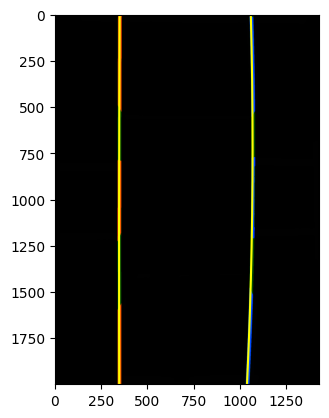

In [121]:
# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
result, left_fit_refined, right_fit_refined, left_fitx, right_fitx, ploty = search_around_poly(img_warped_croped, left_fit, right_fit)

# View your output
plt.imshow(result)